In [1]:
import numpy as np
import pandas as pd
import os
# import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tqdm import tqdm
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import glob
# import pandas as pan
# import matplotlib.pyplot as plotter
import warnings
warnings.filterwarnings('ignore')

In [3]:
datagambar = 'Datasets/datasets'
file_list = pd.DataFrame(os.listdir(datagambar), columns=['Files_Name'])
print(file_list)

     Files_Name
0     .DS_Store
1       battery
2    biological
3   brown-glass
4     cardboard
5       clothes
6   green-glass
7         metal
8         paper
9       plastic
10        shoes
11        trash
12  white-glass


In [4]:
# Mencari file-file gambar dalam direktori yang telah ditentukan
files = [i for i in glob.glob(datagambar + "//*//*")]

# Mengacak urutan file-file tersebut
np.random.shuffle(files)

# Mendapatkan label untuk setiap file berdasarkan nama direktori induknya
labels = [os.path.dirname(i).split("/")[-1] for i in files]

# Menggabungkan setiap file dengan labelnya
data = zip(files, labels)

# Membuat DataFrame dari pasangan file-label
dataframe = pd.DataFrame(data, columns = ["Image", "Label"])

# Mengembalikan DataFrame yang berisi informasi file gambar dan labelnya
dataframe

,Image,Label
0,Datasets/datasets\clothes\clothes4233.jpg,datasets\clothes
1,Datasets/datasets\battery\battery674.jpg,datasets\battery
2,Datasets/datasets\clothes\clothes1552.jpg,datasets\clothes
3,Datasets/datasets\metal\metal440.jpg,datasets\metal
4,Datasets/datasets\clothes\clothes2955.jpg,datasets\clothes
...,...,...
17536,Datasets/datasets\clothes\clothes1457.jpg,datasets\clothes
17537,Datasets/datasets\clothes\clothes1814.jpg,datasets\clothes
17538,Datasets/datasets\metal\metal251.jpg,datasets\metal
17539,Datasets/datasets\clothes\clothes723.jpg,datasets\clothes


In [5]:
# Menghitung jumlah kemunculan setiap label
label_counts = dataframe["Label"].value_counts()
label_counts

Label
datasets\clothes        5325
datasets\shoes          1977
datasets\paper          1644
datasets\plastic        1347
datasets\cardboard      1294
datasets\metal          1179
datasets\biological      985
datasets\battery         945
datasets\trash           834
datasets\white-glass     775
datasets\green-glass     629
datasets\brown-glass     607
Name: count, dtype: int64

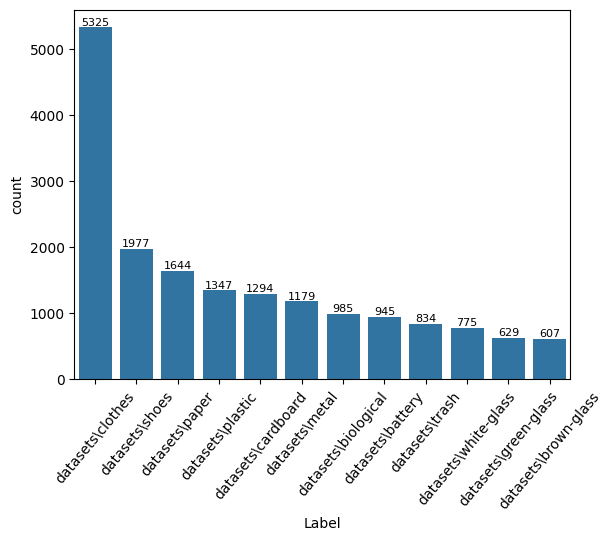

In [6]:
# Menghitung jumlah kemunculan setiap label
label_counts = dataframe["Label"].value_counts()

# Mengurutkan data berdasarkan jumlah kemunculan label
label_counts_sorted = label_counts.sort_values(ascending=False)

# Membuat countplot dengan data yang sudah diurutkan
sns.countplot(x=dataframe["Label"], order=label_counts_sorted.index)

# Menambahkan angka rincian di atas setiap batang
for i, count in enumerate(label_counts_sorted):
    plt.text(i, count, str(count), ha="center", va="bottom", fontsize=8)

# Mengatur rotasi label sumbu x
plt.xticks(rotation=50)

# Menampilkan plot
plt.show()

In [7]:
train_data_dir =datagambar
batch_size = 128                           
target_size = (180,180)
validation_split = 0.2

In [8]:
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=50,                                                         # de 100 para 50
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=100,                                                         # de 200 para 100
    image_size=target_size,
    batch_size=batch_size,
)

Found 17541 files belonging to 12 classes.
Using 14033 files for training.
Found 17541 files belonging to 12 classes.
Using 3508 files for validation.


In [9]:
class_names = train.class_names
class_names

['battery',
 'biological',
 'brown-glass',
 'cardboard',
 'clothes',
 'green-glass',
 'metal',
 'paper',
 'plastic',
 'shoes',
 'trash',
 'white-glass']

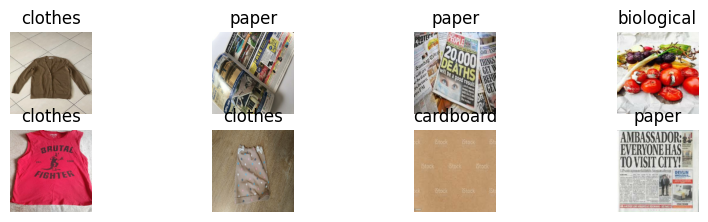

In [10]:
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    for i in range(8):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [12]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Melatih model
history = model.fit(train, validation_data=validation, epochs=20, callbacks=[early_stopping])


Epoch 1/20
110/110 [==============================] - 256s 2s/step - loss: 1.8264 - accuracy: 0.3981 - val_loss: 1.3199 - val_accuracy: 0.5758
Epoch 2/20
110/110 [==============================] - 549s 5s/step - loss: 1.2196 - accuracy: 0.6012 - val_loss: 0.9864 - val_accuracy: 0.6904
Epoch 3/20
110/110 [==============================] - 538s 5s/step - loss: 1.0192 - accuracy: 0.6643 - val_loss: 0.8808 - val_accuracy: 0.7092
Epoch 4/20
110/110 [==============================] - 185s 2s/step - loss: 0.8959 - accuracy: 0.7075 - val_loss: 0.7654 - val_accuracy: 0.7503
Epoch 5/20
110/110 [==============================] - 175s 2s/step - loss: 0.7653 - accuracy: 0.7489 - val_loss: 0.6211 - val_accuracy: 0.7996
Epoch 6/20
110/110 [==============================] - 174s 2s/step - loss: 0.6915 - accuracy: 0.7729 - val_loss: 0.6203 - val_accuracy: 0.8016
Epoch 7/20
110/110 [==============================] - 172s 2s/step - loss: 0.5921 - accuracy: 0.8018 - val_loss: 0.4546 - val_accuracy: 0.8617

In [13]:
val_loss, val_accuracy = model.evaluate(validation)
print(f'Akurasi validasi: {val_accuracy*100:.2f}%')


28/28 [==============================] - 9s 301ms/step - loss: 0.2284 - accuracy: 0.9555
Akurasi validasi: 95.55%


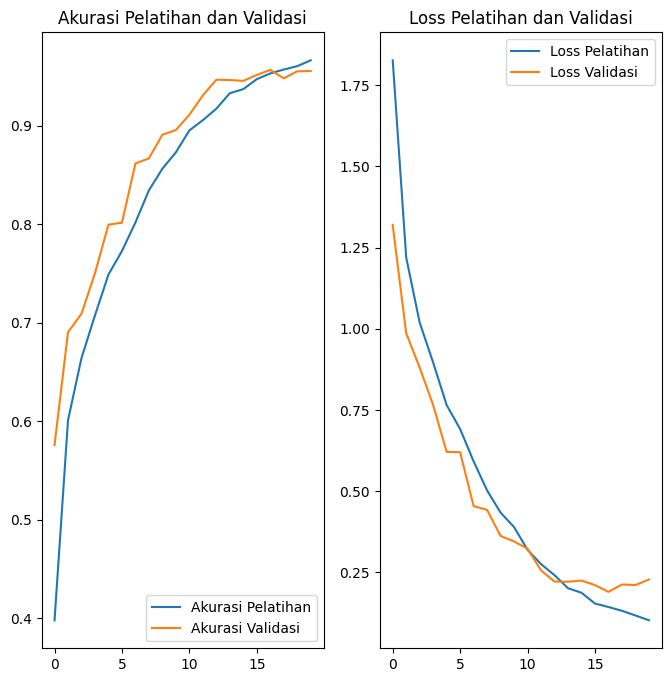

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Akurasi Pelatihan')
plt.plot(epochs_range, val_acc, label='Akurasi Validasi')
plt.legend(loc='lower right')
plt.title('Akurasi Pelatihan dan Validasi')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Loss Pelatihan')
plt.plot(epochs_range, val_loss, label='Loss Validasi')
plt.legend(loc='upper right')
plt.title('Loss Pelatihan dan Validasi')
plt.show()

In [15]:
model.save('trash_model.h5')

In [16]:
import tensorflow as tf
import numpy as np
import pandas as pd
import sklearn
import scipy

print("TensorFlow:", tf.__version__)
print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)
print("scikit-learn:", sklearn.__version__)
print("SciPy:", scipy.__version__)


TensorFlow: 2.13.0
NumPy: 1.24.3
Pandas: 2.0.3
scikit-learn: 1.2.0
SciPy: 1.10.1
